In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [5]:
r_2 = 200000000
r_1 = 150000000
r_b = 300000000 # переходная орбита

v_1 = 20
v_2 = 30

mu = 132712440018

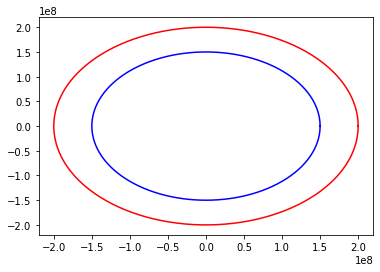

In [6]:
planet_1_x = list()
planet_1_y = list()
for i in range(0, 361):
    x_dot = r_1 * np.cos(i*math.pi/180)
    y_dot = r_1 * np.sin(i*math.pi/180)
    planet_1_x.append(x_dot)
    planet_1_y.append(y_dot)
    

planet_2_x = list()
planet_2_y = list()
for i in range(0, 361):
    x_dot = r_2 * np.cos(i*math.pi/180)
    y_dot = r_2 * np.sin(i*math.pi/180)
    planet_2_x.append(x_dot)
    planet_2_y.append(y_dot)
    
    
plt.plot(planet_2_x, planet_2_y, color = 'red')
plt.plot(planet_1_x, planet_1_y, color = 'blue')

In [16]:
# Calculate velocity impulse here
# https://ru.wikipedia.org/wiki/Биэллиптическая_переходная_орбита

a1 = (r_1 + r_b) / 2
a2 = (r_2 + r_b) / 2

dv_1 = np.sqrt(2*mu/r_1 - mu/a1) - np.sqrt(mu/r_1)
dv_2 = np.sqrt(2*mu/r_b - mu/a2) - np.sqrt(2*mu/r_b - mu/a1)
dv_3 = np.sqrt(2*mu/r_2 - mu/a2) - np.sqrt(mu/r_2)
v_sum = dv_1 + dv_2 + dv_3

v_sum

8.699256790476252

In [22]:
# Calculate bielliptic parameters here

ec_1 = (r_b-r_1)/(r_b+r_1)
a_1 = r_1/(1-ec_1)
c_1 = ec_1 * a_1
b_1 = (a_1*a_1 - c_1*c_1)**0.5
center_1 = a_1 - r_1

ec_2 = (r_2-r_b)/(r_2+r_b)
a_2 = r_b/(1-ec_2)
c_2 = ec_2 * a_2
b_2 = (a_2*a_2 - c_2*c_2)**0.5
center_2 = a_2 - r_2

In [27]:
# Calculations for bielliptic trajectory

traj_x = list()
traj_y = list()
for i in range(0, 181):
    x_dot = (a_1) * np.cos(i*math.pi/180) - center_1
    traj_x.append(x_dot)
    y_dot = (b_1) * np.sin(i*math.pi/180)
    traj_y.append(y_dot)
    
traj_x_2 = list()
traj_y_2 = list()
for i in range(0, 180):
    x_dot = (a_2) * np.cos(i*math.pi/180) - center_2
    traj_x_2.append(x_dot)
    y_dot = - (b_2) * np.sin(i*math.pi/180)
    traj_y_2.append(y_dot)

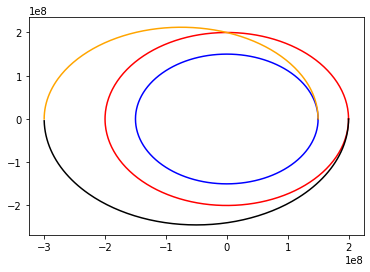

In [28]:
# Drawing trajectory and both orbits

planet_1_x = list()
planet_1_y = list()
for i in range(0, 361):
    x_dot = r_1 * np.cos(i*math.pi/180)
    y_dot = r_1 * np.sin(i*math.pi/180)
    planet_1_x.append(x_dot)
    planet_1_y.append(y_dot)
    

planet_2_x = list()
planet_2_y = list()
for i in range(0, 361):
    x_dot = r_2 * np.cos(i*math.pi/180)
    y_dot = r_2 * np.sin(i*math.pi/180)
    planet_2_x.append(x_dot)
    planet_2_y.append(y_dot)
    
    
plt.plot(planet_2_x, planet_2_y, color = 'red')
plt.plot(planet_1_x, planet_1_y, color = 'blue')

plt.plot(traj_x, traj_y, color = 'orange')
plt.plot(traj_x_2, traj_y_2, color = 'black')

In [30]:
# Calculating transfer time 

t = math.pi * np.sqrt((a1**3)/mu) + math.pi * np.sqrt((a2**3)/mu)
t / (60*60*24)

731.402955014698

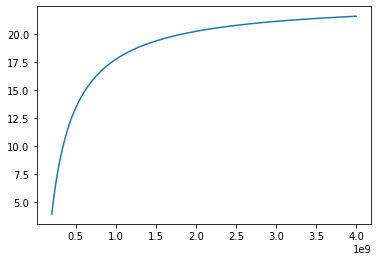

In [39]:
r_2 = 200000000
r_1 = 150000000
v_sum_list = list()
r_b_list = list()

for i in range(r_2, r_2*20, 1000000):
    r_b = i # переходная орбита
    r_b_list.append(r_b)
    
    v_1 = 20
    v_2 = 30

    mu = 132712440018

    a1 = (r_1 + r_b) / 2
    a2 = (r_2 + r_b) / 2

    dv_1 = np.sqrt(2*mu/r_1 - mu/a1) - np.sqrt(mu/r_1)
    dv_2 = np.sqrt(2*mu/r_b - mu/a2) - np.sqrt(2*mu/r_b - mu/a1)
    dv_3 = np.sqrt(2*mu/r_2 - mu/a2) - np.sqrt(mu/r_2)
    v_sum = dv_1 + dv_2 + dv_3

    v_sum_list.append(v_sum)
    
plt.plot(r_b_list, v_sum_list)